In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
df=pd.read_csv("titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<AxesSubplot:>

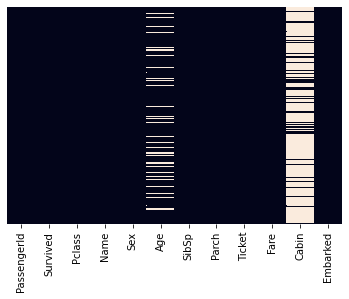

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
def inputAge(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 30
        else:
            return 24
    else:
        return Age

In [11]:
df['Age']=df[['Age','Pclass']].apply(inputAge,axis=1)

In [12]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
df['Sex'].replace({'male':1,'female':0},inplace=True)

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df['Embarked']=df['Embarked'].fillna("S")

In [18]:
df['Embarked'].replace({"S":1,"C":2,"Q":3},inplace=True)

<AxesSubplot:>

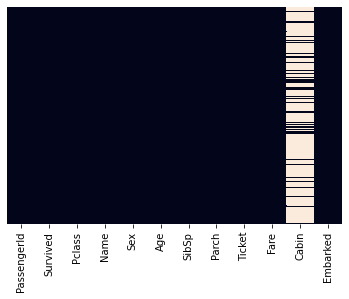

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

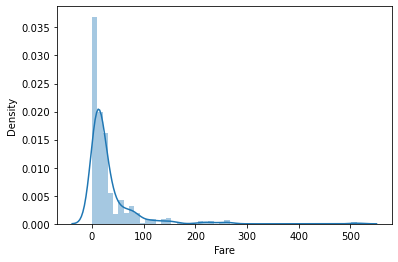

In [21]:
sns.distplot(df['Fare'])

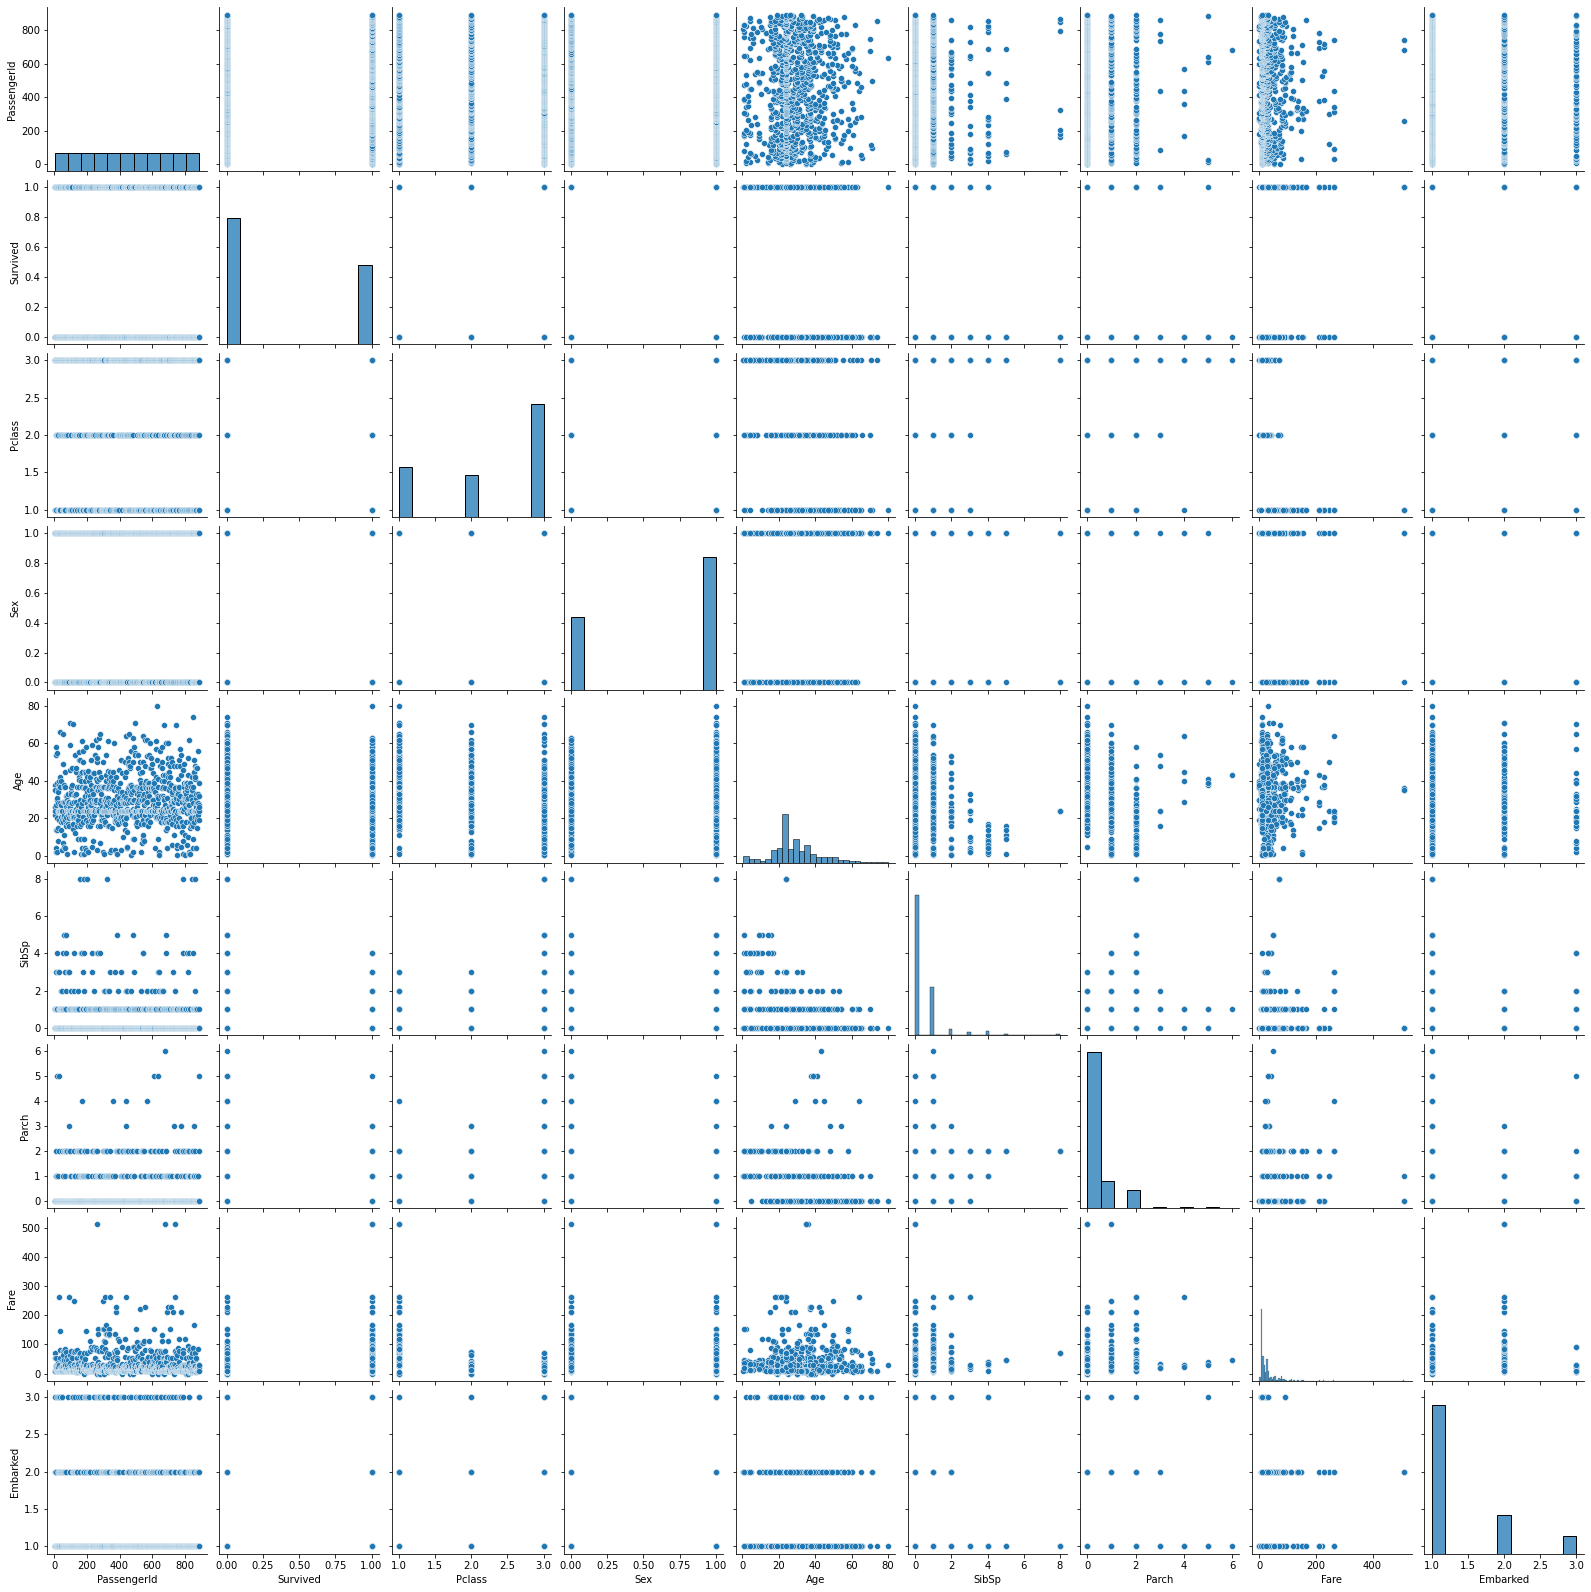

In [22]:
sns.pairplot(df)

In [23]:
a=df.corr()
a

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035770,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.047292,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.408819,0.083081,0.018443,-0.549500,0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.078752,-0.114631,-0.245489,-0.182333,-0.116569
Age,0.035770,-0.047292,-0.408819,0.078752,1.000000,-0.243961,-0.171531,0.123324,-0.047167
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.243961,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.171531,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.123324,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,-0.116569,-0.047167,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

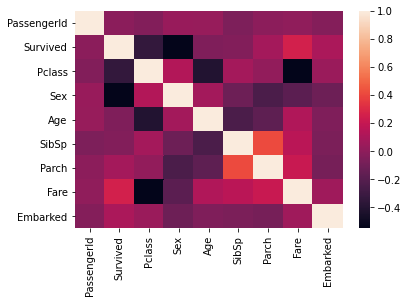

In [24]:
sns.heatmap(a)

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
x=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
y=df['Survived']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [28]:
x_train.index

Int64Index([ 69,  85, 794, 161, 815, 516, 299, 454,  59, 879,
            ...
            578,  53, 866, 350,  79, 855, 871, 835, 792, 520],
           dtype='int64', length=623)

In [29]:
x_test.index

Int64Index([205,  44, 821, 458, 795, 118, 424, 678, 269, 229,
            ...
            490, 814, 218, 445, 489, 111, 730, 105, 479, 277],
           dtype='int64', length=268)

In [30]:
log=LogisticRegression()


In [31]:
log.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred=log.predict(x_test)

In [33]:
pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0], dtype=int64)

In [34]:
df1=pd.DataFrame({"Predicted":pred,"Actual":y_test})
df1

,Predicted,Actual
205,1,0
44,1,1
821,0,1
458,1,1
795,0,0
...,...,...
111,1,0
730,1,1
105,0,0
479,1,1


In [35]:
x_train.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
69,70,3,1,26.0,2,0,8.6625,1


In [36]:
log.predict([[87,3,0,34,1,0,7.567,1]])

array([1], dtype=int64)

In [37]:
confusion_matrix(y_test,pred)

array([[140,  19],
       [ 38,  71]], dtype=int64)

In [38]:
tp,fn,fp,tn=confusion_matrix(y_test,pred).reshape(-1)

In [39]:
tp

140

In [40]:
fp

38

In [41]:
fn

19

In [42]:
tn

71

In [43]:
accuracy_score(y_test,pred)

0.7873134328358209

In [44]:
recall_score(y_test,pred)

0.6513761467889908

In [45]:
precision_score(y_test,pred)

0.7888888888888889

In [46]:
f1_score(y_test,pred)

0.7135678391959799